In [43]:
# Importing the libraries
import pandas as pd
import numpy as np
import scipy 
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import MinMaxScaler 
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics

import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt   #Data visualisation libraries 
import seaborn as sns
%matplotlib inline
    

In [44]:
missing_value_threshold = 0.05
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/"
data_file = "processed.cleveland.data"
missing_values = ["n/a", "na", "--", "?"]
features = [ "age", "sex", "cp", "trestbps", "chol","fbs", "restecg",
                   "thalach","exang", "oldpeak","slope", "ca", "thal"]
target = "num"
method = 'median'
test_size = 20
random_state =  0 # 101
# Importing the datasets
df = pd.read_csv(url + data_file, names=features + [target], na_values = missing_values)



In [45]:

# Understanding data
print()
print("*"*20)
print("Understanding data")
print(df.head(20))
print("data shape")
print(df.shape)
print("data type")
print(df.dtypes)



********************
Understanding data
     age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  slope   ca  thal  num
0   63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3    3.0  0.0   6.0    0
1   67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5    2.0  3.0   3.0    2
2   67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6    2.0  2.0   7.0    1
3   37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5    3.0  0.0   3.0    0
4   41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4    1.0  0.0   3.0    0
5   56.0  1.0  2.0     120.0  236.0  0.0      0.0    178.0    0.0      0.8    1.0  0.0   3.0    0
6   62.0  0.0  4.0     140.0  268.0  0.0      2.0    160.0    0.0      3.6    3.0  2.0   3.0    3
7   57.0  0.0  4.0     120.0  354.0  0.0      0.0    163.0    1.0      0.6    1.0  0.0   3.0    0
8   63.0  1.0  4.0     130.0  254.0  0.0      2.0    147.0    0.0      1.4   


********************
visualize the relationship between the features and the target using scatterplots


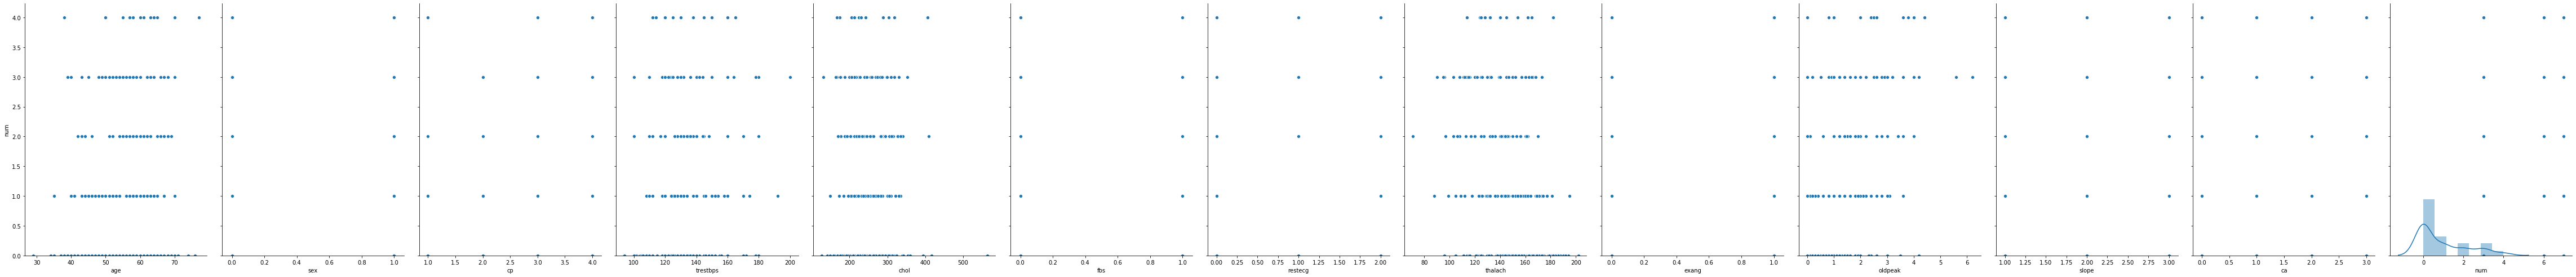

In [46]:
#visualize the relationship between the features and the response using scatterplots
print()
print("*"*20)
print("visualize the relationship between the features and the target using scatterplots")
sns.pairplot(df, x_vars=features, y_vars=[target], size=7, aspect=0.7)
sns.distplot(df[target])



In [47]:

#Descriptive Statistics
print()
print("*"*20)
print("Descriptive Statistics")
print(df.info())
print(df.describe())
print(df.columns)



********************
Descriptive Statistics
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null float64
sex         303 non-null float64
cp          303 non-null float64
trestbps    303 non-null float64
chol        303 non-null float64
fbs         303 non-null float64
restecg     303 non-null float64
thalach     303 non-null float64
exang       303 non-null float64
oldpeak     303 non-null float64
slope       303 non-null float64
ca          299 non-null float64
thal        301 non-null float64
num         303 non-null int64
dtypes: float64(13), int64(1)
memory usage: 33.3 KB
None
           age      sex       cp  trestbps     chol      fbs  restecg  thalach    exang  oldpeak  \
count  303.000  303.000  303.000    303.00  303.000  303.000  303.000  303.000  303.000  303.000   
mean    54.439    0.680    3.158    131.69  246.693    0.149    0.990  149.607    0.327    1.040   
std      9.039    0.467    0.960 

In [48]:
print()
print("*"*20)
print("Classification distribution")
#Classification distribution 
print(df.groupby(target).size())
#Correlation Between Attributes
pd.set_option('display.width', 100)
pd.set_option('precision', 3)
print(df.corr(method='pearson'))
#Skew attributes
print(df.skew())


********************
Classification distribution
num
0    164
1     55
2     36
3     35
4     13
dtype: int64
            age    sex     cp  trestbps   chol    fbs  restecg  thalach  exang  oldpeak  slope  \
age       1.000 -0.098  0.104     0.285  0.209  0.119    0.149   -0.394  0.092    0.204  0.162   
sex      -0.098  1.000  0.010    -0.064 -0.200  0.048    0.022   -0.049  0.146    0.102  0.038   
cp        0.104  0.010  1.000    -0.036  0.072 -0.040    0.068   -0.334  0.384    0.202  0.152   
trestbps  0.285 -0.064 -0.036     1.000  0.130  0.175    0.147   -0.045  0.065    0.189  0.117   
chol      0.209 -0.200  0.072     0.130  1.000  0.010    0.171   -0.003  0.061    0.047 -0.004   
fbs       0.119  0.048 -0.040     0.175  0.010  1.000    0.070   -0.008  0.026    0.006  0.060   
restecg   0.149  0.022  0.068     0.147  0.171  0.070    1.000   -0.083  0.085    0.114  0.134   
thalach  -0.394 -0.049 -0.334    -0.045 -0.003 -0.008   -0.083    1.000 -0.378   -0.343 -0.386   
exang 

In [49]:


X = df.iloc[:, :-1].values
y = df.iloc[:, 13].values
print(df.head())
# Missing data
total_missing_value = 0;
for feature in features:
    if df[feature].isnull().any().sum() > 0:
        total_missing_value += df[feature].isnull().any().sum()
print("Total missing value is %s!" %str(total_missing_value))
rate_missing_value = total_missing_value

if rate_missing_value == 0:
    print("No NaN or Missing value detect!")
elif rate_missing_value < 10 or 'drop' in method:
    print("Rate of NaN or Missing value is very low (%s), drop missing value rows!" %str(rate_missing_value))
    df.dropna(inplace=True)
else:
    imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
    imputer = imputer.fit(X[:, 0:13])
    X[:, 0:13] = imputer.transform(X[:, 0:13])
    
  

    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  slope   ca  thal  num
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3    3.0  0.0   6.0    0
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5    2.0  3.0   3.0    2
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6    2.0  2.0   7.0    1
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5    3.0  0.0   3.0    0
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4    1.0  0.0   3.0    0
Total missing value is 2!
Rate of NaN or Missing value is very low (2), drop missing value rows!


In [50]:
 

#Splitting the X into X_tr and X_te 

new_features = ["ca", "cp", "slope", "oldpeak", "thal", "exang", "restecg", "sex"]
new_features = ["ca", "cp", "slope", "oldpeak", "thal"]
y = df[target]
X = df[new_features]
#X = df.drop([target], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = random_state)




In [38]:


#Feature scaling
print("*"*20)
print("Feature Scaling and normalize data")
print()
# separate array into input and output components
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
# summarize transformed data
np.set_printoptions(precision=3)
print(X)
print(X_train)
print(X_test)

********************
Feature Scaling and normalize data

[[0.    0.    1.    0.371 0.75 ]
 [1.    1.    0.5   0.242 0.   ]
 [0.667 1.    0.5   0.419 1.   ]
 ...
 [0.667 1.    0.5   0.548 1.   ]
 [0.333 1.    0.5   0.194 1.   ]
 [0.333 0.333 0.5   0.    0.   ]]
[[0.333 1.    0.5   0.226 1.   ]
 [0.333 1.    0.5   0.452 1.   ]
 [0.    0.333 0.    0.    0.   ]
 ...
 [1.    1.    0.    0.29  1.   ]
 [0.    1.    0.5   0.419 1.   ]
 [0.667 1.    0.5   0.323 0.75 ]]
[[0.    0.    1.    0.    0.75 ]
 [0.    1.    1.    0.158 0.   ]
 [0.333 0.667 1.    0.158 0.75 ]
 [0.    1.    0.    0.    0.   ]
 [0.    0.333 0.    0.    0.   ]
 [0.333 1.    0.    0.    0.   ]
 [0.    0.    1.    1.    1.   ]
 [0.    1.    1.    0.316 0.   ]
 [1.    0.667 1.    0.526 1.   ]
 [0.    1.    1.    0.    0.   ]
 [0.667 1.    0.    0.158 0.75 ]
 [0.    0.667 0.    0.421 0.   ]
 [0.    1.    0.    0.605 0.75 ]
 [0.333 0.667 1.    0.105 1.   ]
 [0.    0.333 1.    0.474 0.   ]
 [0.333 0.667 0.    0.    0.   ]
 [0.333

In [39]:

# Estimating ("Learning") Model Coefficients
### STATSMODELS ###

# create a fitted model
# lm1 = smf.ols(formula='Sales ~ TV', data=data).fit()
# # print the coefficients
# lm1.params
print("*"*20)
print("STATSMODELS")
print()    
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print("Statis model summary")
print(olsres.summary())
print("Statis model parameters")
print(olsres.params)
ypred = olsres.predict(X)
print("Y Prediction static model")
print()
print(ypred)
# print the confidence intervals for the model coefficients
print("the confidence intervals for the model coefficients")
print(olsres.conf_int())



********************
STATSMODELS

Statis model summary
                                 OLS Regression Results                                
Dep. Variable:                    num   R-squared (uncentered):                   0.689
Model:                            OLS   Adj. R-squared (uncentered):              0.684
Method:                 Least Squares   F-statistic:                              129.6
Date:                Tue, 05 Nov 2019   Prob (F-statistic):                    5.71e-72
Time:                        13:14:37   Log-Likelihood:                         -378.69
No. Observations:                 297   AIC:                                      767.4
Df Residuals:                     292   BIC:                                      785.8
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.02

In [40]:

#lets train our model
### SCIKIT-LEARN ###

print("*"*20)
print("SCIKIT-LEARN")
print()
mln_model=linear_model.LinearRegression()
mln_model.fit(X_train,y_train)
# print the coefficients
print("Linear model intercept")
print(mln_model.intercept_)
print("Linear model Coeeficient")
#print(mln_model.coef_)
# pair the feature names with the coefficients
print(list(zip(features, mln_model.coef_)))

#Predicting the values
#Predicting the values of traing set
y_pred_train = mln_model.predict(X_train)
y_pred_train = np.round(y_pred_train)
#Predicting the values of test set
y_pred_test = mln_model.predict(X_test)
y_pred_test = np.round(y_pred_test)

#Predicting the test values
y_pred = mln_model.predict(X_test)
y_pred = np.round(y_pred)



********************
SCIKIT-LEARN

Linear model intercept
-0.6415503506620517
Linear model Coeeficient
[('age', 1.3373290898276242), ('sex', 0.9256613954326217), ('cp', 0.4356643388003234), ('trestbps', 1.2061828532886676), ('chol', 0.6618801783636739)]


In [41]:
# Model Evaluation Using Train/Test Split
from sklearn.metrics import f1_score
print()
print("******F1 Score********")
print(f1_score(y_test, y_pred, average='macro'))
# RMSE
## calculate r-square 
#lm1.rsquared
print()
print("********RMSE********")
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# calculate MAE, MSE, RMSE
# print(metrics.mean_absolute_error(y_true, y_pred))
# print(metrics.mean_squared_error(y_true, y_pred))
# print(np.sqrt(metrics.mean_squared_error(y_true, y_pred)))
print()
print("*"*20)

#Confusion matrix
from sklearn.metrics import confusion_matrix
#Train
cm_train = confusion_matrix(y_train,y_pred_train)
#Test
cm_test = confusion_matrix(y_test,y_pred_test)

tot_test = cm_test[0][0]+cm_test[1][1]+cm_test[0][1]+cm_test[1][0]
tot_train = cm_train[0][0]+cm_train[1][1]+cm_train[0][1]+cm_train[1][0]

print("The Training data set is split into train set and test set (2:8)")

print("Accuracy of train set is :",((cm_train[0][0]+cm_train[1][1])/tot_train)*100 , "%" )

print("Accuracy of test set is  : " , ((cm_test[0][0]+cm_test[1][1])/tot_test)*100 , " %")


******F1 Score********
0.2627272727272727

********RMSE********
0.9219544457292888

********************
The Training data set is split into train set and test set (2:8)
Accuracy of train set is : 98.94736842105263 %
Accuracy of test set is  :  72.72727272727273  %


C:\Users\770339\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
